# Machine LEarning in Python

by Dominik Krzemiński & Piotr Migdał

for El Passion, 2017

## Random Forest

See also:

* [sklearn.ensemble.RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [Random Forests](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm) by Leo Breiman and Adele Cutler (its creators)
* [Layman's Introduction to Random Forests](http://blog.echen.me/2011/03/14/laymans-introduction-to-random-forests/) by Edwin Chen
* [How does randomization in a random forest work?](https://www.quora.com/How-does-randomization-in-a-random-forest-work)

Maybe also:

* http://blog.citizennet.com/blog/2012/11/10/random-forests-ensembles-and-performance-metrics
* plot from https://en.wikipedia.org/wiki/Decision_tree_learning ?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
# plt.style.use('ggplot')
sns.set_style('whitegrid')

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# to be moved somewhere else
from sklearn.linear_model import LogisticRegression

In [4]:
patients = pd.read_csv("data/uci_fertility_clean.csv")

In [5]:
patients.head()

,season,age,childish_diseases,accident,surgery,fever_last_year,alcohol,smoking,sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1


In [6]:
# data we use for prediction
X = patients.drop('diagnosis', axis='columns')

# data we want to predict
Y = patients['diagnosis']

In [7]:
print(X.shape)
X.head()

(100, 9)


,season,age,childish_diseases,accident,surgery,fever_last_year,alcohol,smoking,sitting
0,-0.33,0.69,0,1,1,0,0.8,0,0.88
1,-0.33,0.94,1,0,1,0,0.8,1,0.31
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50


In [8]:
print(Y.shape)
Y.head()

(100,)


0    0
1    1
2    0
3    0
4    1
Name: diagnosis, dtype: int64

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [10]:
X_train.shape

(75, 9)

In [11]:
X_train.head()

,season,age,childish_diseases,accident,surgery,fever_last_year,alcohol,smoking,sitting
15,1.0,0.81,1,1,0,0,1.0,1,0.50
40,-1.0,0.53,1,1,1,0,0.8,1,0.50
96,-1.0,0.61,1,0,0,0,0.8,0,0.50
9,1.0,0.61,1,0,0,0,1.0,-1,0.25
72,1.0,0.56,1,0,0,1,0.6,0,0.50


In [36]:
#rf = LogisticRegression(C=10.)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [37]:
rf.score(X_train, Y_train)

1.0

In [38]:
rf.score(X_test, Y_test)

0.92000000000000004

In [39]:
Y_test.mean()

0.12

In [40]:
# more trees is better

In [41]:
cross_val_score(rf, X, Y, cv=5)

array([ 0.85714286,  0.85714286,  0.9       ,  0.89473684,  0.89473684])

In [101]:
rf.feature_importances_

array([ 0.15248797,  0.23159942,  0.04474194,  0.07236553,  0.05335056,
        0.07786001,  0.11230599,  0.07275199,  0.1825366 ])

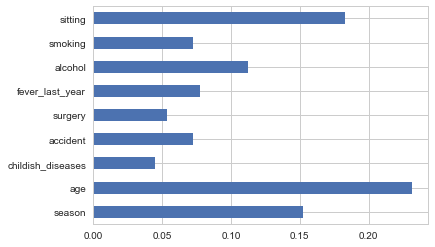

In [103]:
pd.Series(rf.feature_importances_, index=X.columns).plot('barh')